## Importing the Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the Data

In [4]:
df = pd.read_csv("salaries.csv")
df.head(22)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


## Independent and dependent variabe

In [31]:
independent_var = df.drop('salary_more_then_100k',axis='columns')
independent_var

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [32]:
target = df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

## Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

In [34]:
independent_var['company_n'] = label_encoder.fit_transform(independent_var['company'])
independent_var['job_n'] = label_encoder.fit_transform(independent_var['job'])
independent_var['degree_n'] = label_encoder.fit_transform(independent_var['degree'])

In [35]:
independent_var

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [36]:
independent_var_n = independent_var.drop(['company','job','degree'],axis='columns')

In [37]:
independent_var_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [38]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

## Train_Test_Split

In [48]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(independent_var_n,target,train_size=0.80,random_state=1)

## Decision Tree

In [41]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

In [42]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Plotting a Decision Tree

In [43]:
from sklearn import tree

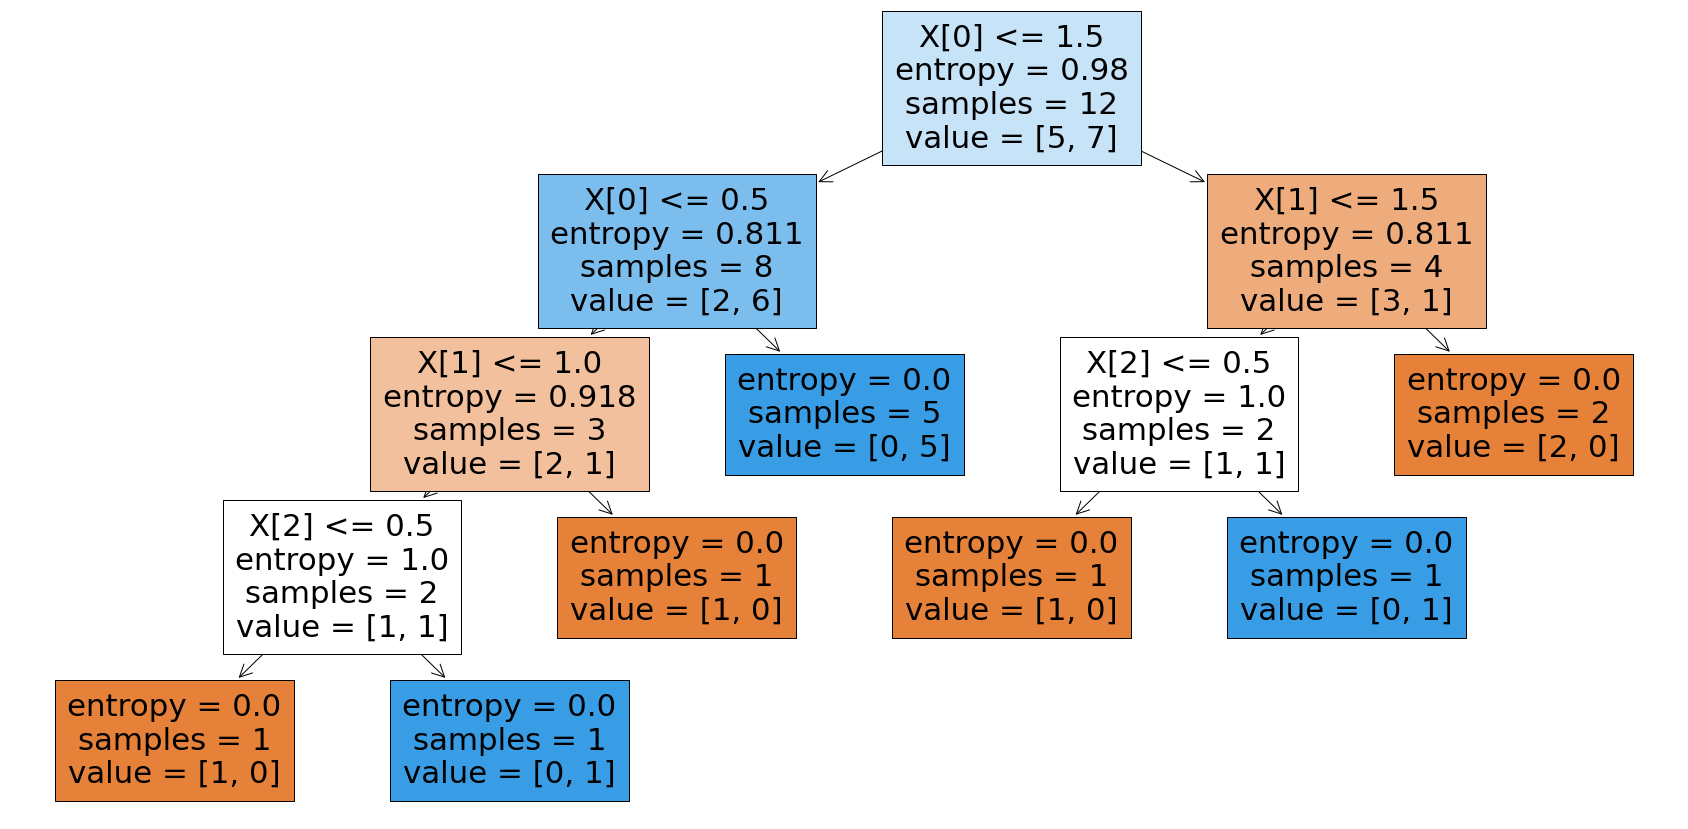

In [44]:
plt.figure(figsize=(30,15))
tree.plot_tree(model,filled=True)
plt.show()

In [45]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 0], dtype=int64)

In [46]:
y_test

3     1
13    1
7     0
2     1
Name: salary_more_then_100k, dtype: int64

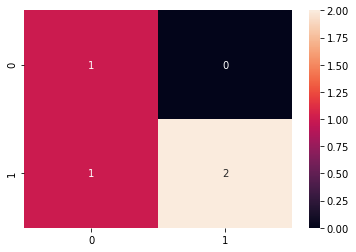

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [47]:
model.score(x_test,y_test)

0.75